In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Video games.csv')

In [3]:
df.dropna(axis=1, how='all')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


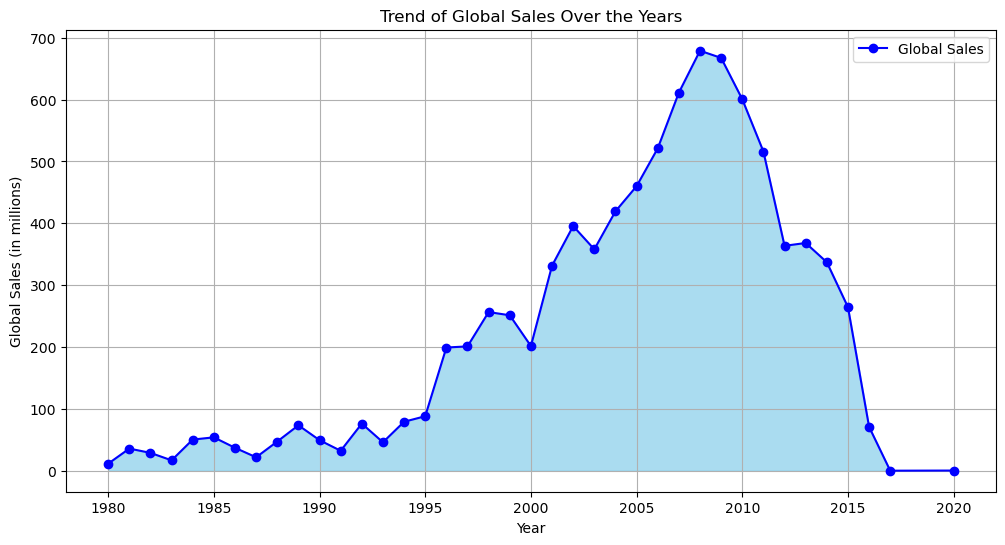

In [4]:
# Group data by year and calculate the sum of global sales for each year
sales_by_year = df.groupby('Year')['Global_Sales'].sum()

# Create the area chart
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.fill_between(sales_by_year.index, sales_by_year, color='skyblue', alpha=0.7)
plt.plot(sales_by_year.index, sales_by_year, marker='o', color='b', label='Global Sales')
plt.title('Trend of Global Sales Over the Years')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.legend()
plt.grid(True)

# Show the area chart
plt.show()

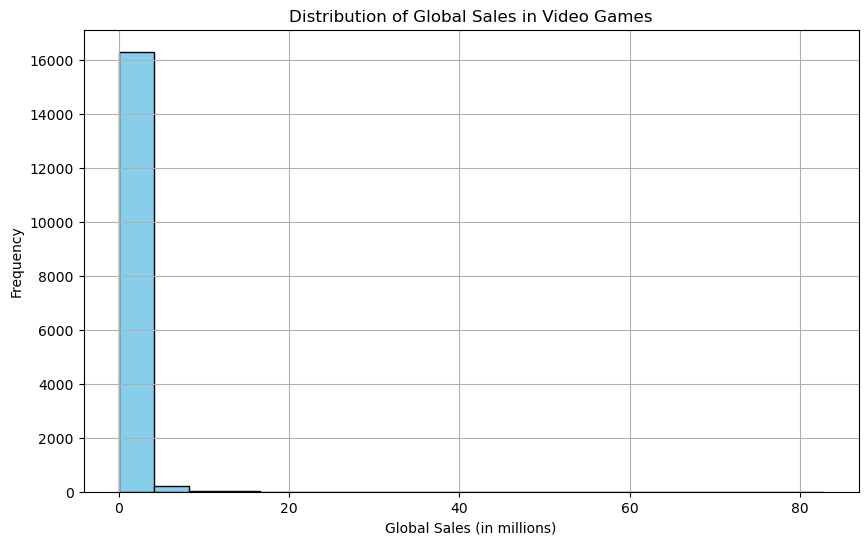

In [5]:
global_sales = df['Global_Sales']
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(global_sales, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Global Sales in Video Games')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Frequency')
plt.grid(True)

# Show the histogram
plt.show()

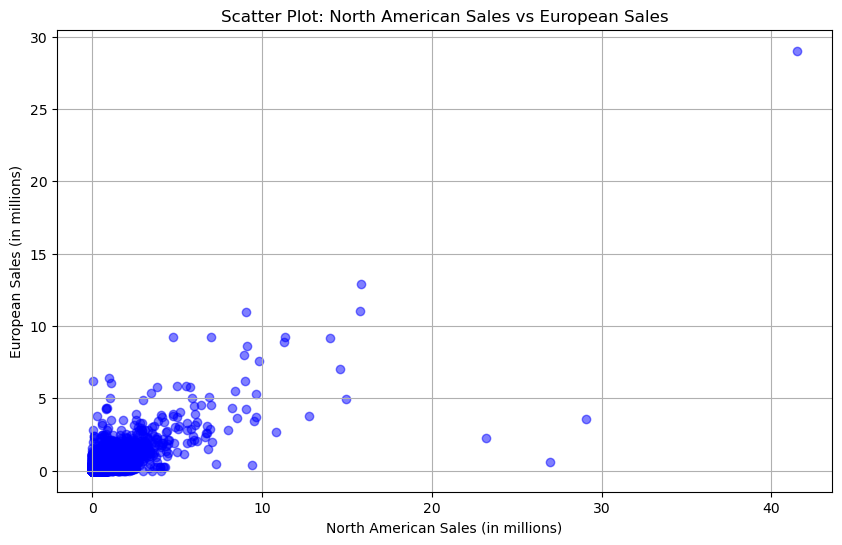

In [6]:
# Extract the North American and European sales data
na_sales = df['NA_Sales']
eu_sales = df['EU_Sales']

# Create the scatter plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.scatter(na_sales, eu_sales, alpha=0.5, color='b')
plt.title('Scatter Plot: North American Sales vs European Sales')
plt.xlabel('North American Sales (in millions)')
plt.ylabel('European Sales (in millions)')
plt.grid(True)

# Show the scatter plot
plt.show()

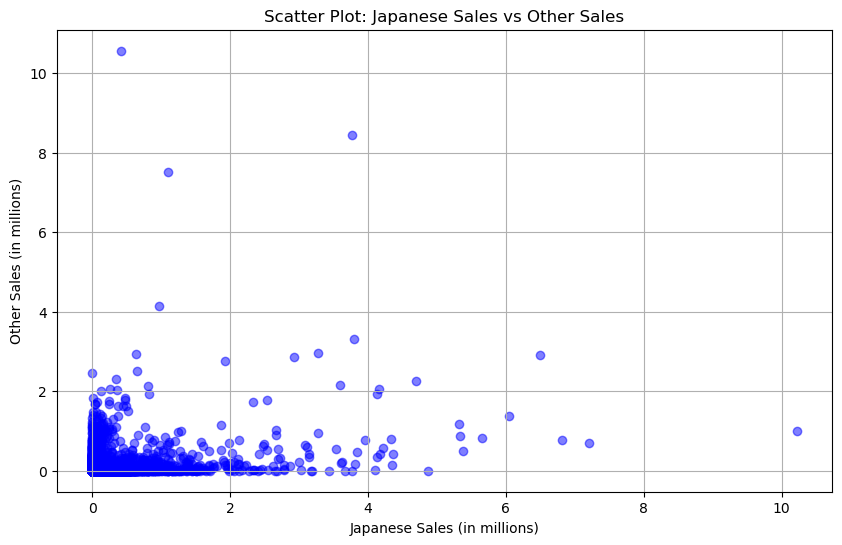

In [7]:
# Extract the Japanese sales and Other sales data
jp_sales = df['JP_Sales']
other_sales = df['Other_Sales']

# Create the scatter plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.scatter(jp_sales, other_sales, alpha=0.5, color='b')
plt.title('Scatter Plot: Japanese Sales vs Other Sales')
plt.xlabel('Japanese Sales (in millions)')
plt.ylabel('Other Sales (in millions)')
plt.grid(True)

# Show the scatter plot
plt.show()

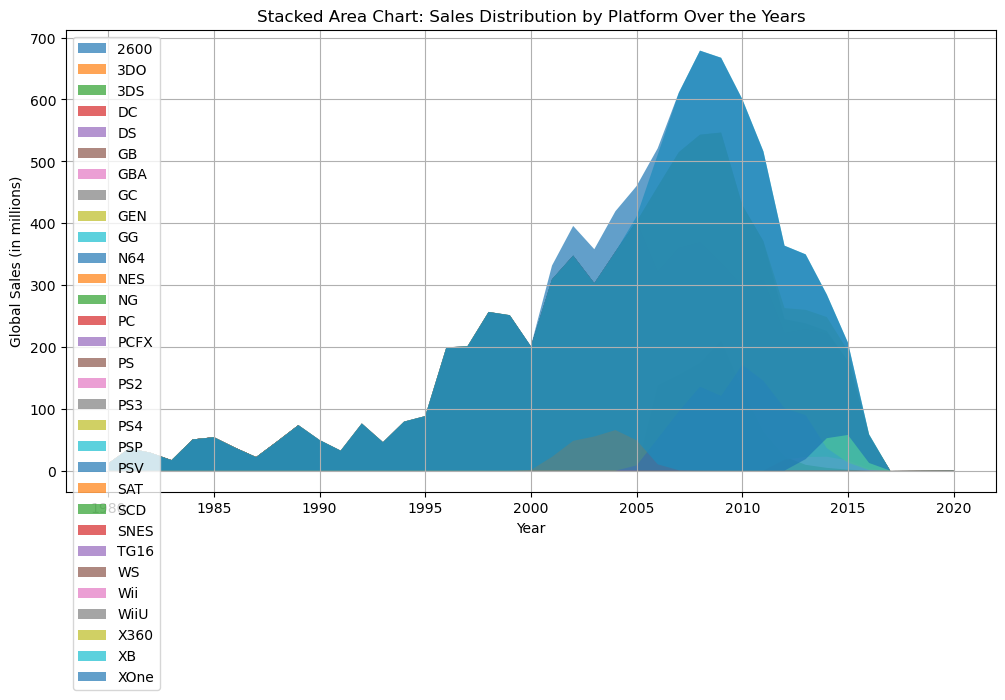

In [8]:
# Pivot the data to create a DataFrame suitable for a stacked area chart
pivot_df = df.pivot_table(index='Year', columns='Platform', values='Global_Sales', aggfunc='sum', fill_value=0)

# Create the stacked area chart
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
platforms = pivot_df.columns
bottom = pd.Series([0] * len(pivot_df), index=pivot_df.index)
for platform in platforms:
    plt.fill_between(pivot_df.index, bottom, pivot_df[platform], alpha=0.7, label=platform)
    bottom += pivot_df[platform]

plt.title('Stacked Area Chart: Sales Distribution by Platform Over the Years')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.legend(loc='upper left')
plt.grid(True)

# Show the stacked area chart
plt.show()

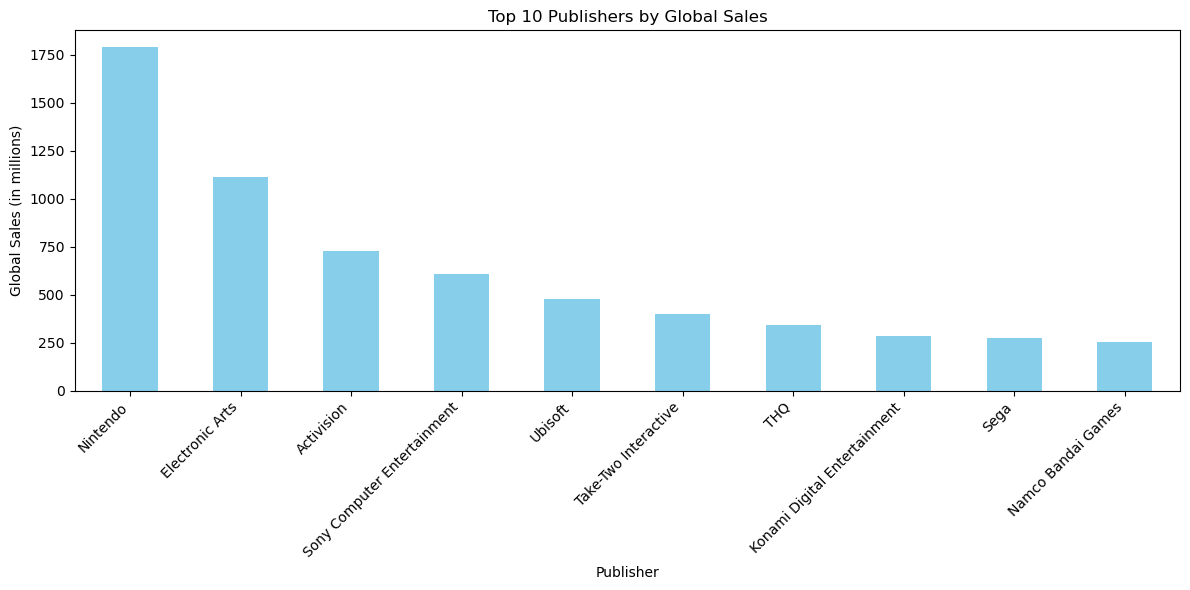

In [9]:
# Group data by publisher and calculate the sum of global sales for each publisher
publisher_sales = df.groupby('Publisher')['Global_Sales'].sum()

# Sort the publishers by global sales in descending order and take the top 10
top_publishers = publisher_sales.sort_values(ascending=False).head(10)

# Create the bar chart
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
top_publishers.plot(kind='bar', color='skyblue')
plt.title('Top 10 Publishers by Global Sales')
plt.xlabel('Publisher')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=45, ha="right")

# Show the bar chart
plt.tight_layout()
plt.show()

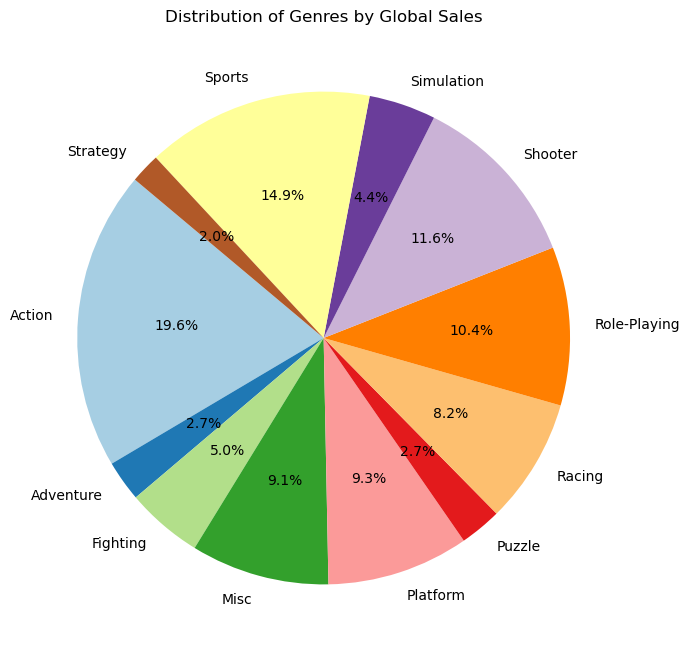

In [10]:
# Group data by genre and calculate the sum of global sales for each genre
genre_sales = df.groupby('Genre')['Global_Sales'].sum()

# Create the pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(genre_sales, labels=genre_sales.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(genre_sales))))
plt.title('Distribution of Genres by Global Sales')

# Show the pie chart
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
# Define the threshold for 'success' (e.g., above 75th percentile)
threshold = df['Global_Sales'].quantile(0.75)
df['Success'] = (df['Global_Sales'] > threshold).astype(int)

# Select features and target variable
features = ['Platform', 'Genre', 'Publisher']
target = 'Success'

# Encode categorical variables
encoder = LabelEncoder()
for feature in features:
    df[feature] = encoder.fit_transform(df[feature])

# Split the data into features and target variable
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=1)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.7484939759036144
Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      2485
           1       1.00      0.00      0.00       835

    accuracy                           0.75      3320
   macro avg       0.87      0.50      0.43      3320
weighted avg       0.81      0.75      0.64      3320



In [18]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[2485    0]
 [ 835    0]]


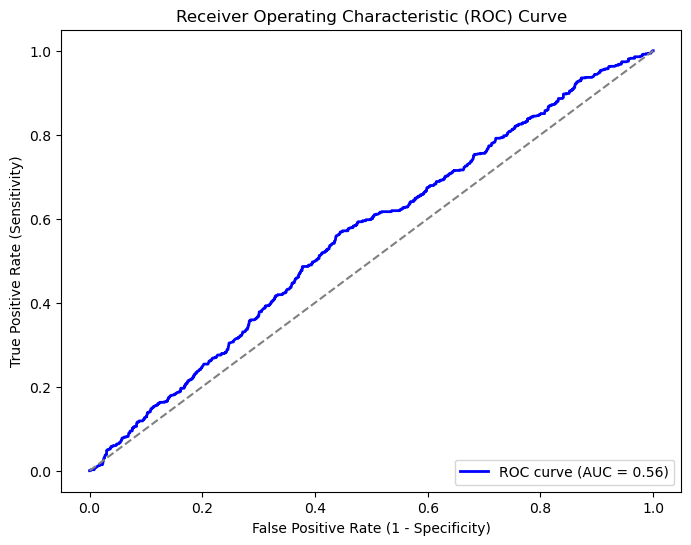

In [19]:
from sklearn.metrics import roc_curve, auc

# Calculate the probabilities of the positive class
y_probs = model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [4]:
from sklearn.neighbors import KNeighborsClassifier

# Assuming 'X' represents features and 'y' represents labels
X = [[1, 1], [2, 9], [3, 5], [4, 7]]  # Features (two-dimensional array)
y = [0, 1, 0, 1]  # Labels (one-dimensional array)

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to your data
knn.fit(X, y)

# Assuming 'new_point' is the new data point for which you want to predict the label
new_point = [[4, 3]]  # Example new point

# Predict the label for the new point
predicted_label = knn.predict(new_point)

print("Predicted Label:", predicted_label)

Predicted Label: [0]


Predicted Label: [0]
